# Comprehensive Exploratory Data Analysis
## Cross-Market 30D Directional Forecasting Project

This notebook provides comprehensive EDA following patterns from **Module 02** of the Stock Markets Analytics Zoomcamp.

### Analysis includes:
- **Data Quality Assessment** - missing values, distributions, outliers
- **Target Variable Analysis** - class balance, temporal patterns
- **Feature Correlation Analysis** - correlation with target, feature importance
- **Regional Performance Analysis** - US vs EU vs Asia vs ETF performance
- **Macro Indicators Analysis** - VIX, 10Y Treasury impact
- **Temporal Patterns** - seasonality, market regimes
- **Feature Engineering Validation** - technical indicators effectiveness

In [2]:
# Imports following Module 02 patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pathlib import Path
import sys
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append(str(Path().resolve().parent / "src"))

from config import (
    PROCESSED_DATA_DIR, TICKER_MARKETS, 
    TECHNICAL_INDICATORS, MACRO_INDICATORS
)

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

%matplotlib inline

print("📊 Comprehensive EDA Notebook Initialized")
print(f"📂 Data directory: {PROCESSED_DATA_DIR}")

📊 Comprehensive EDA Notebook Initialized
📂 Data directory: C:\Users\Gleb\work\courses\2025-05-30_stocks-analytics-course\project\data\processed


## 1. Data Loading and Initial Assessment

Following Module 02 patterns for data loading and basic info analysis.

In [3]:
# Load the processed dataset
dataset_file = PROCESSED_DATA_DIR / "dataset.parquet"

if not dataset_file.exists():
    print("❌ Dataset not found. Please run:")
    print("   python run.py --stage features")
    raise FileNotFoundError(f"Dataset not found: {dataset_file}")

print("📂 Loading processed dataset...")
df = pd.read_parquet(dataset_file)

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape}")
print(f"📅 Date range: {df.index.min()} to {df.index.max()}")
print(f"🏢 Unique symbols: {df['symbol'].nunique()}")

📂 Loading processed dataset...
✅ Dataset loaded successfully!
📊 Shape: (381708, 61)
📅 Date range: 2000-01-03 00:00:00 to 2025-07-10 00:00:00
🏢 Unique symbols: 65


In [4]:
# Basic dataset information following Module 02 patterns
print("=== DATASET OVERVIEW ===")
print(f"Total records: {len(df):,}")
print(f"Columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print("\n=== COLUMN TYPES ===")
print(df.dtypes.value_counts())

# Display first few rows
print("\n=== SAMPLE DATA ===")
df.head()

=== DATASET OVERVIEW ===
Total records: 381,708
Columns: 61
Memory usage: 210.2 MB

=== COLUMN TYPES ===
float64    56
object      2
int32       2
int64       1
Name: count, dtype: int64

=== SAMPLE DATA ===


,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol,market,Capital Gains,...,rsi_14_zscore,rsi_14_rank,vix,tnx10y,dxy,move,irx,gspc,ndx,rut
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,564.733459,564.733459,564.733459,564.733459,0,0.0,0.0,7203.T,ASIA,NaN,...,0.0,NaN,24.209999,6.548,21.251015,120.209999,5.27,1455.219971,3790.550049,496.420013
2000-01-03,0.787090,0.844316,0.763168,0.840094,535796800,0.0,0.0,AAPL,US,NaN,...,0.0,NaN,24.209999,6.548,21.251015,120.209999,5.27,1455.219971,3790.550049,496.420013
2000-01-03,11.637696,11.637696,11.147042,11.223706,1185699,0.0,0.0,XLF,SECTOR,0.0,...,0.0,NaN,24.209999,6.548,21.251015,120.209999,5.27,1455.219971,3790.550049,496.420013
2000-01-03,11.925790,12.042025,11.763060,11.856049,12873345,0.0,0.0,PFE,US,NaN,...,0.0,NaN,24.209999,6.548,21.251015,120.209999,5.27,1455.219971,3790.550049,496.420013
2000-01-03,17.670403,17.948239,17.309215,17.406458,13458200,0.0,0.0,XOM,US,NaN,...,0.0,NaN,24.209999,6.548,21.251015,120.209999,5.27,1455.219971,3790.550049,496.420013


=== SYMBOL BREAKDOWN BY MARKET ===
market
US           30
ASIA         11
EU            9
COMMODITY     5
REGIONAL      5
SECTOR        5
Name: symbol, dtype: int64


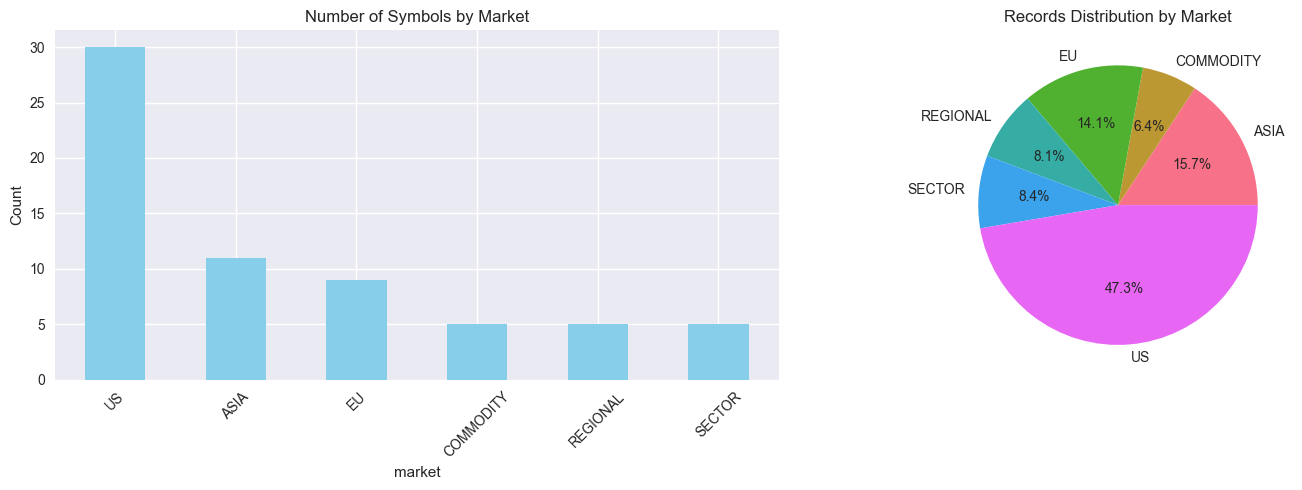

In [5]:
# Symbols breakdown by market (following Module 02 categorical analysis)
print("=== SYMBOL BREAKDOWN BY MARKET ===")

# Add market classification if not present
if 'market' not in df.columns:
    df['market'] = df['symbol'].map(TICKER_MARKETS)

market_summary = df.groupby('market')['symbol'].nunique().sort_values(ascending=False)
print(market_summary)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Market distribution
market_summary.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Number of Symbols by Market')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Records per market
records_by_market = df.groupby('market').size()
records_by_market.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Records Distribution by Market')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

## 2. Data Quality Assessment

Following Module 02 patterns for missing values analysis and data quality checks.

=== MISSING VALUES ANALYSIS ===

📊 Columns with missing values: 34
                Missing_Count  Missing_Percentage
Capital Gains          294473           77.146143
dist_low_252d           16315            4.274210
dist_high_252d          16315            4.274210
sma_200                 12935            3.388716
price_sma200            12935            3.388716
sma_50                   3185            0.834407
price_sma50              3185            0.834407
vol_30d                  1950            0.510862
ret_20d                  1300            0.340574
vol_20d_rank             1300            0.340574


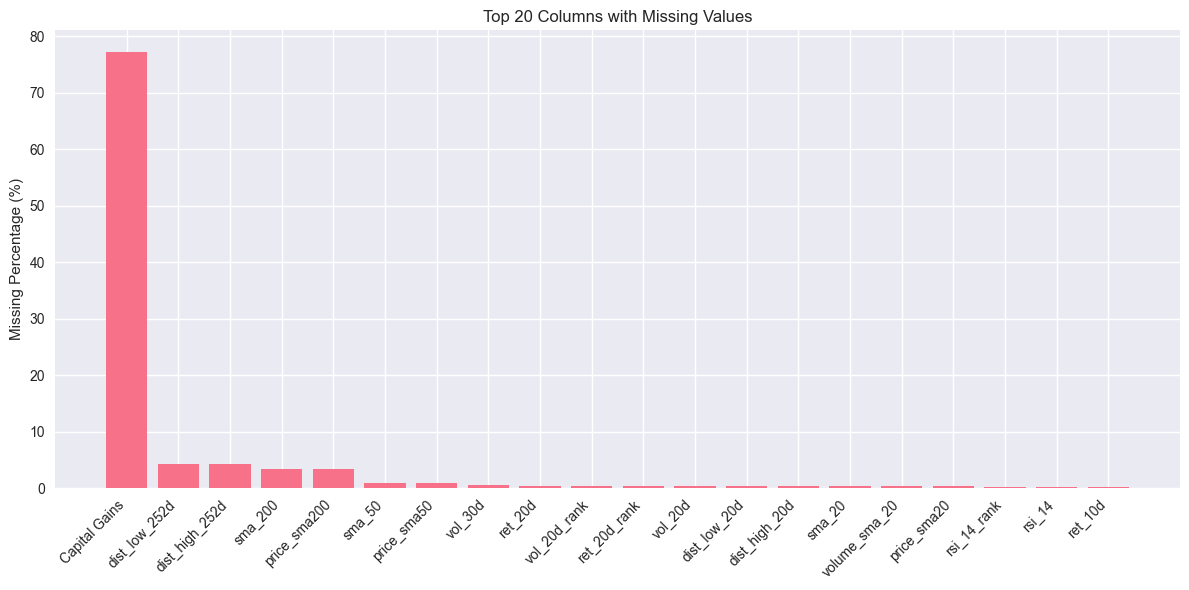

In [6]:
# Missing values analysis (Module 02 pattern)
print("=== MISSING VALUES ANALYSIS ===")

missing_stats = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

missing_stats = missing_stats[missing_stats['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_stats) > 0:
    print(f"\n📊 Columns with missing values: {len(missing_stats)}")
    print(missing_stats.head(10))
    
    # Visualization
    if len(missing_stats) > 0:
        plt.figure(figsize=(12, 6))
        top_missing = missing_stats.head(20)
        plt.bar(range(len(top_missing)), top_missing['Missing_Percentage'])
        plt.xticks(range(len(top_missing)), top_missing.index, rotation=45, ha='right')
        plt.title('Top 20 Columns with Missing Values')
        plt.ylabel('Missing Percentage (%)')
        plt.tight_layout()
        plt.show()
else:
    print("✅ No missing values found in the dataset!")

=== TARGET VARIABLE ANALYSIS ===
Target columns found: ['ret_1d', 'ret_5d', 'ret_10d', 'ret_20d', 'ret_30d', 'y_30d', 'ret_20d_zscore', 'ret_20d_rank']

📊 Records after removing missing targets: 381,708 (removed 0)

=== CLASS BALANCE ===
Class 0 (Down): 158,454 (41.5%)
Class 1 (Up): 223,254 (58.5%)


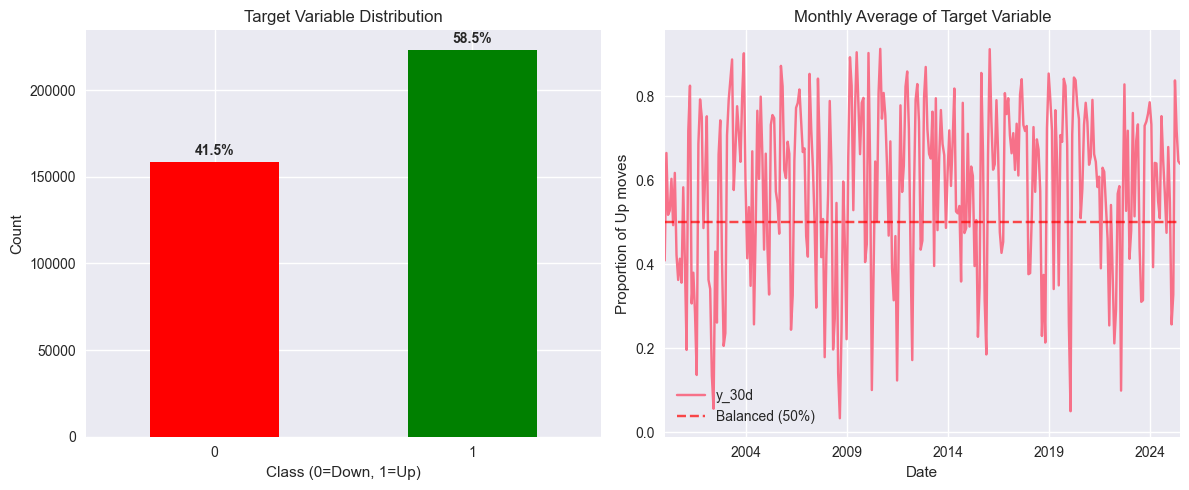

In [7]:
# Check for target variable availability
print("=== TARGET VARIABLE ANALYSIS ===")

target_cols = [col for col in df.columns if col.startswith('y_') or col.startswith('ret_')]
print(f"Target columns found: {target_cols}")

if 'y_30d' in df.columns:
    # Remove rows without target
    df_clean = df.dropna(subset=['y_30d']).copy()
    print(f"\n📊 Records after removing missing targets: {len(df_clean):,} (removed {len(df) - len(df_clean):,})")
    
    # Class balance analysis
    class_balance = df_clean['y_30d'].value_counts().sort_index()
    class_pct = df_clean['y_30d'].value_counts(normalize=True).sort_index() * 100
    
    print(f"\n=== CLASS BALANCE ===")
    print(f"Class 0 (Down): {class_balance[0]:,} ({class_pct[0]:.1f}%)")
    print(f"Class 1 (Up): {class_balance[1]:,} ({class_pct[1]:.1f}%)")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Class distribution
    class_balance.plot(kind='bar', ax=ax1, color=['red', 'green'])
    ax1.set_title('Target Variable Distribution')
    ax1.set_xlabel('Class (0=Down, 1=Up)')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=0)
    
    # Add percentage labels
    for i, (count, pct) in enumerate(zip(class_balance, class_pct)):
        ax1.text(i, count + max(class_balance) * 0.01, f'{pct:.1f}%', 
                ha='center', va='bottom', fontweight='bold')
    
    # Class balance over time
    monthly_balance = df_clean.groupby([df_clean.index.to_period('M')])['y_30d'].mean()
    monthly_balance.plot(ax=ax2)
    ax2.set_title('Monthly Average of Target Variable')
    ax2.set_ylabel('Proportion of Up moves')
    ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Balanced (50%)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Use cleaned dataset for further analysis
    df = df_clean
else:
    print("❌ Target variable 'y_30d' not found!")

## 3. Feature Correlation Analysis

Analyzing correlations between features and target variable, following Module 02 correlation analysis patterns.

In [8]:
# Identify feature categories (Module 02 pattern)
print("=== FEATURE CATEGORIZATION ===")

# Exclude non-feature columns
exclude_cols = ['symbol', 'market', 'Open', 'High', 'Low', 'Close', 'Volume', 
                'Dividends', 'Stock Splits', 'y_30d', 'ret_30d']

# Get all numeric feature columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [col for col in numeric_cols if col not in exclude_cols]

print(f"📊 Total features available for analysis: {len(feature_cols)}")

# Categorize features
feature_categories = {
    'Returns': [f for f in feature_cols if 'ret_' in f and not f.startswith('ret_future')],
    'Volatility': [f for f in feature_cols if 'vol_' in f],
    'Moving Averages': [f for f in feature_cols if any(x in f for x in ['sma_', 'ema_'])],
    'Technical': [f for f in feature_cols if any(x in f for x in ['rsi_', 'macd', 'bb_', 'atr_'])],
    'Price Features': [f for f in feature_cols if any(x in f for x in ['price_', 'dist_'])],
    'Macro': [f for f in feature_cols if any(x in f for x in ['vix', 'tnx', 'dxy'])],
    'Other': [f for f in feature_cols if not any(cat in f for cat in 
             ['ret_', 'vol_', 'sma_', 'ema_', 'rsi_', 'macd', 'bb_', 'atr_', 'price_', 'dist_', 'vix', 'tnx', 'dxy'])]
}

for category, features in feature_categories.items():
    if features:
        print(f"  {category}: {len(features)} features")
        print(f"    Examples: {features[:3]}{'...' if len(features) > 3 else ''}")

=== FEATURE CATEGORIZATION ===
📊 Total features available for analysis: 50
  Returns: 6 features
    Examples: ['ret_1d', 'ret_5d', 'ret_10d']...
  Volatility: 6 features
    Examples: ['vol_5d', 'vol_10d', 'vol_20d']...
  Moving Averages: 8 features
    Examples: ['sma_5', 'sma_10', 'sma_20']...
  Technical: 6 features
    Examples: ['macd', 'macd_signal', 'macd_hist']...
  Price Features: 7 features
    Examples: ['price_sma20', 'price_sma50', 'price_sma200']...
  Macro: 3 features
    Examples: ['vix', 'tnx10y', 'dxy']
  Other: 14 features
    Examples: ['Capital Gains', 'ln_volume', 'close_lag_1']...


=== FEATURE-TARGET CORRELATIONS ===

🔍 Top 15 features correlated with target:
is_positive_growth_30d_future    1.000000
growth_future_30d                0.688329
tnx10y                           0.072019
move                             0.054257
irx                              0.031508
vix                              0.027372
vol_20d                          0.019296
vol_30d                          0.018445
vol_10d                          0.018000
volume_sma_20                    0.017226
vol_5d                           0.014485
sma_20                           0.014222
ret_5d                           0.014216
sma_10                           0.014176
sma_5                            0.014141
Name: y_30d, dtype: float64


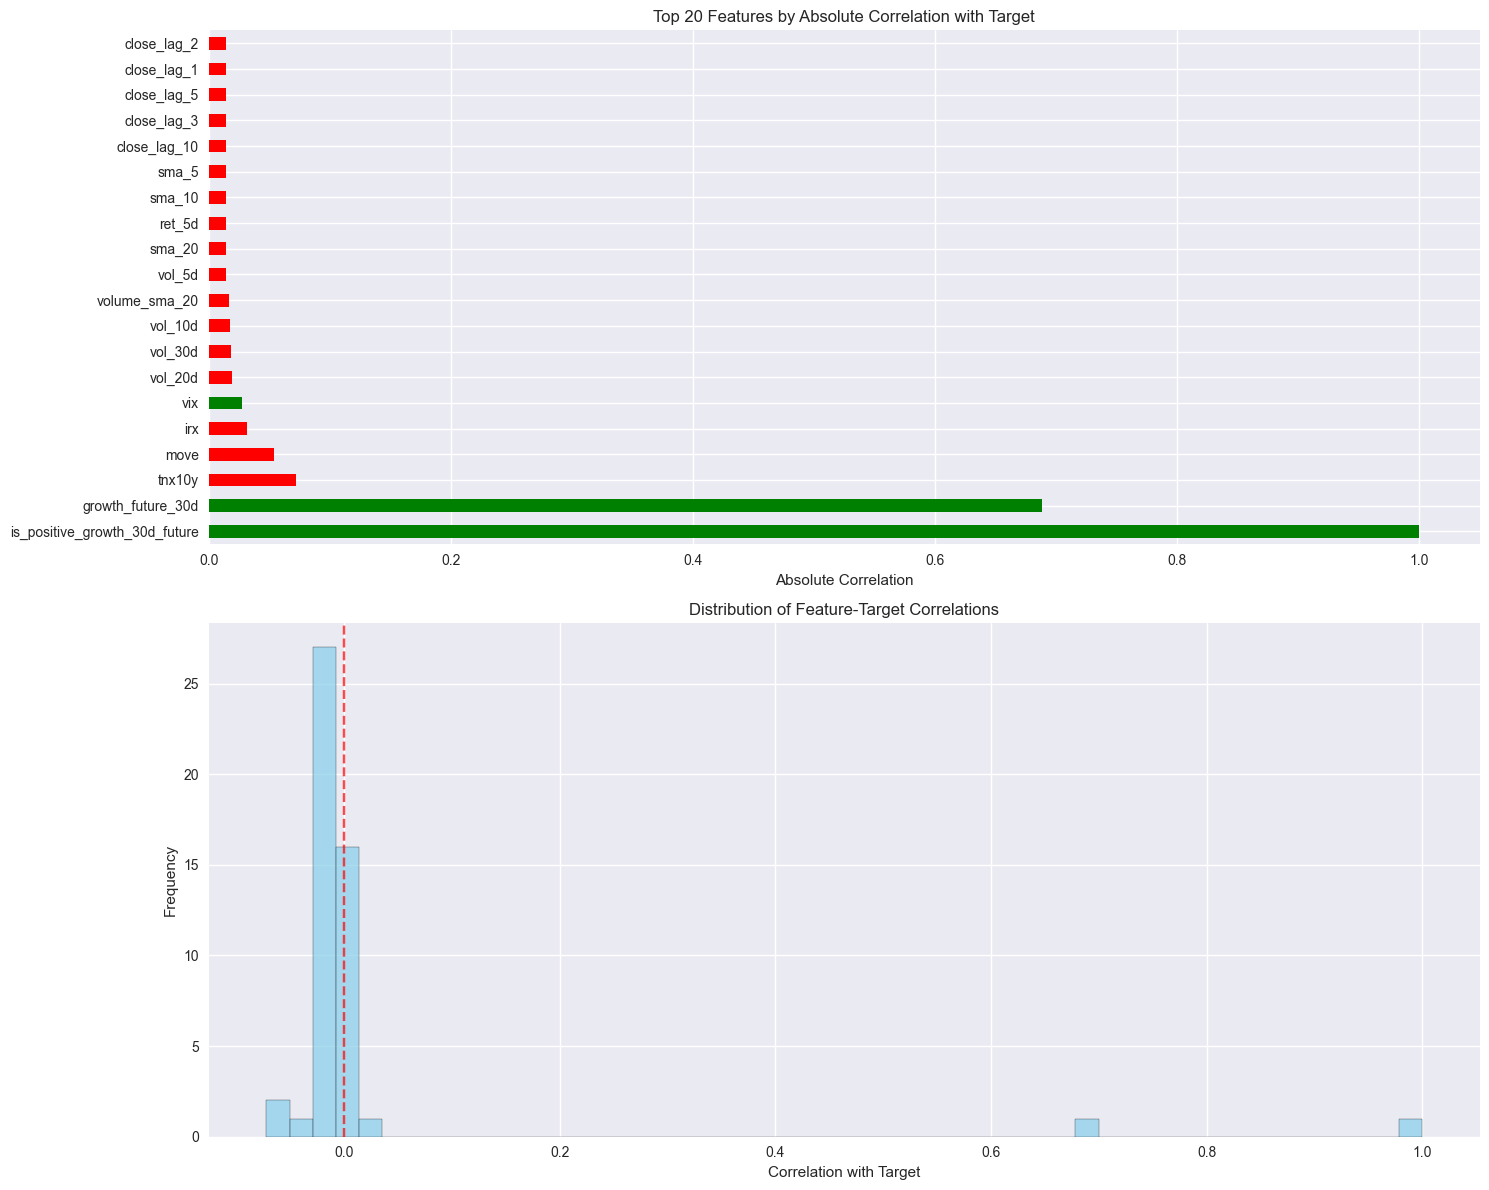


📊 Correlation Statistics:
  Mean absolute correlation: 0.0473
  Max correlation: 1.0000 (is_positive_growth_30d_future)
  Min correlation: -0.0720 (tnx10y)
  Features with |corr| > 0.05: 4
  Features with |corr| > 0.10: 2


In [9]:
# Correlation with target variable (Module 02 pattern)
print("=== FEATURE-TARGET CORRELATIONS ===")

# Calculate correlations with target
target_corrs = df[feature_cols + ['y_30d']].corr()['y_30d'].drop('y_30d')
target_corrs_abs = target_corrs.abs().sort_values(ascending=False)

print(f"\n🔍 Top 15 features correlated with target:")
print(target_corrs_abs.head(15))

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Top correlations (absolute values)
top_corrs = target_corrs_abs.head(20)
colors = ['green' if target_corrs[feat] > 0 else 'red' for feat in top_corrs.index]
top_corrs.plot(kind='barh', ax=ax1, color=colors)
ax1.set_title('Top 20 Features by Absolute Correlation with Target')
ax1.set_xlabel('Absolute Correlation')

# Distribution of all correlations
ax2.hist(target_corrs, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.7)
ax2.set_title('Distribution of Feature-Target Correlations')
ax2.set_xlabel('Correlation with Target')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Statistical summary
print(f"\n📊 Correlation Statistics:")
print(f"  Mean absolute correlation: {target_corrs_abs.mean():.4f}")
print(f"  Max correlation: {target_corrs.max():.4f} ({target_corrs.idxmax()})")
print(f"  Min correlation: {target_corrs.min():.4f} ({target_corrs.idxmin()})")
print(f"  Features with |corr| > 0.05: {(target_corrs_abs > 0.05).sum()}")
print(f"  Features with |corr| > 0.10: {(target_corrs_abs > 0.10).sum()}")

=== FEATURE INTERCORRELATIONS ===


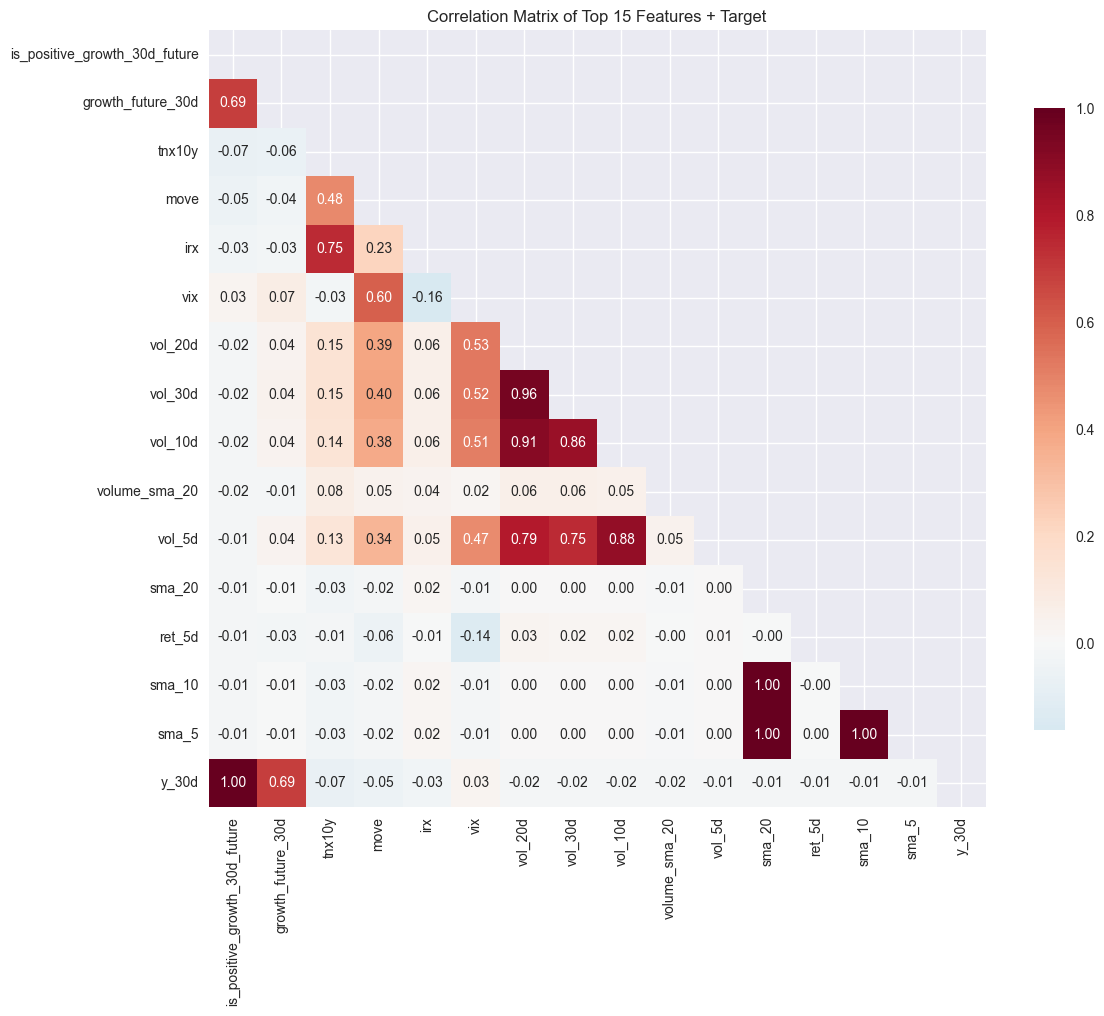


⚠️  Highly correlated feature pairs (|corr| > 0.8):
  is_positive_growth_30d_future ↔ y_30d: 1.000
  vol_20d ↔ vol_30d: 0.956
  vol_20d ↔ vol_10d: 0.908
  vol_30d ↔ vol_10d: 0.860
  vol_10d ↔ vol_5d: 0.876
  sma_20 ↔ sma_10: 1.000
  sma_20 ↔ sma_5: 0.999
  sma_10 ↔ sma_5: 1.000


In [10]:
# Feature intercorrelations (Module 02 pattern)
print("=== FEATURE INTERCORRELATIONS ===")

# Select top features for correlation matrix
top_features = target_corrs_abs.head(15).index.tolist()
top_features_df = df[top_features + ['y_30d']]

# Calculate correlation matrix
corr_matrix = top_features_df.corr()

# Visualization
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Top 15 Features + Target')
plt.tight_layout()
plt.show()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:  # High correlation threshold
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                corr_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print(f"\n⚠️  Highly correlated feature pairs (|corr| > 0.8):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
else:
    print(f"\n✅ No highly correlated feature pairs found (all |corr| ≤ 0.8)")

## 4. Regional Performance Analysis

Analyzing performance differences across markets (US, EU, Asia, ETFs) following Module 02 categorical analysis patterns.

=== REGIONAL PERFORMANCE ANALYSIS ===

📊 Target Variable Performance by Market:
           y_30d_count  y_30d_mean  y_30d_std  ret_30d_mean  ret_30d_std  \
market                                                                     
REGIONAL         30746      0.6223     0.4848        0.0114       0.0703   
SECTOR           32085      0.6082     0.4882        0.0115       0.0743   
US              180692      0.5925     0.4914        0.0197       0.1105   
EU               53700      0.5780     0.4939        0.0151       0.0941   
ASIA             60081      0.5623     0.4961        0.0191       0.1253   
COMMODITY        24404      0.5210     0.4996        0.0055       0.0873   

           symbol_nunique  
market                     
REGIONAL                5  
SECTOR                  5  
US                     30  
EU                      9  
ASIA                   11  
COMMODITY               5  


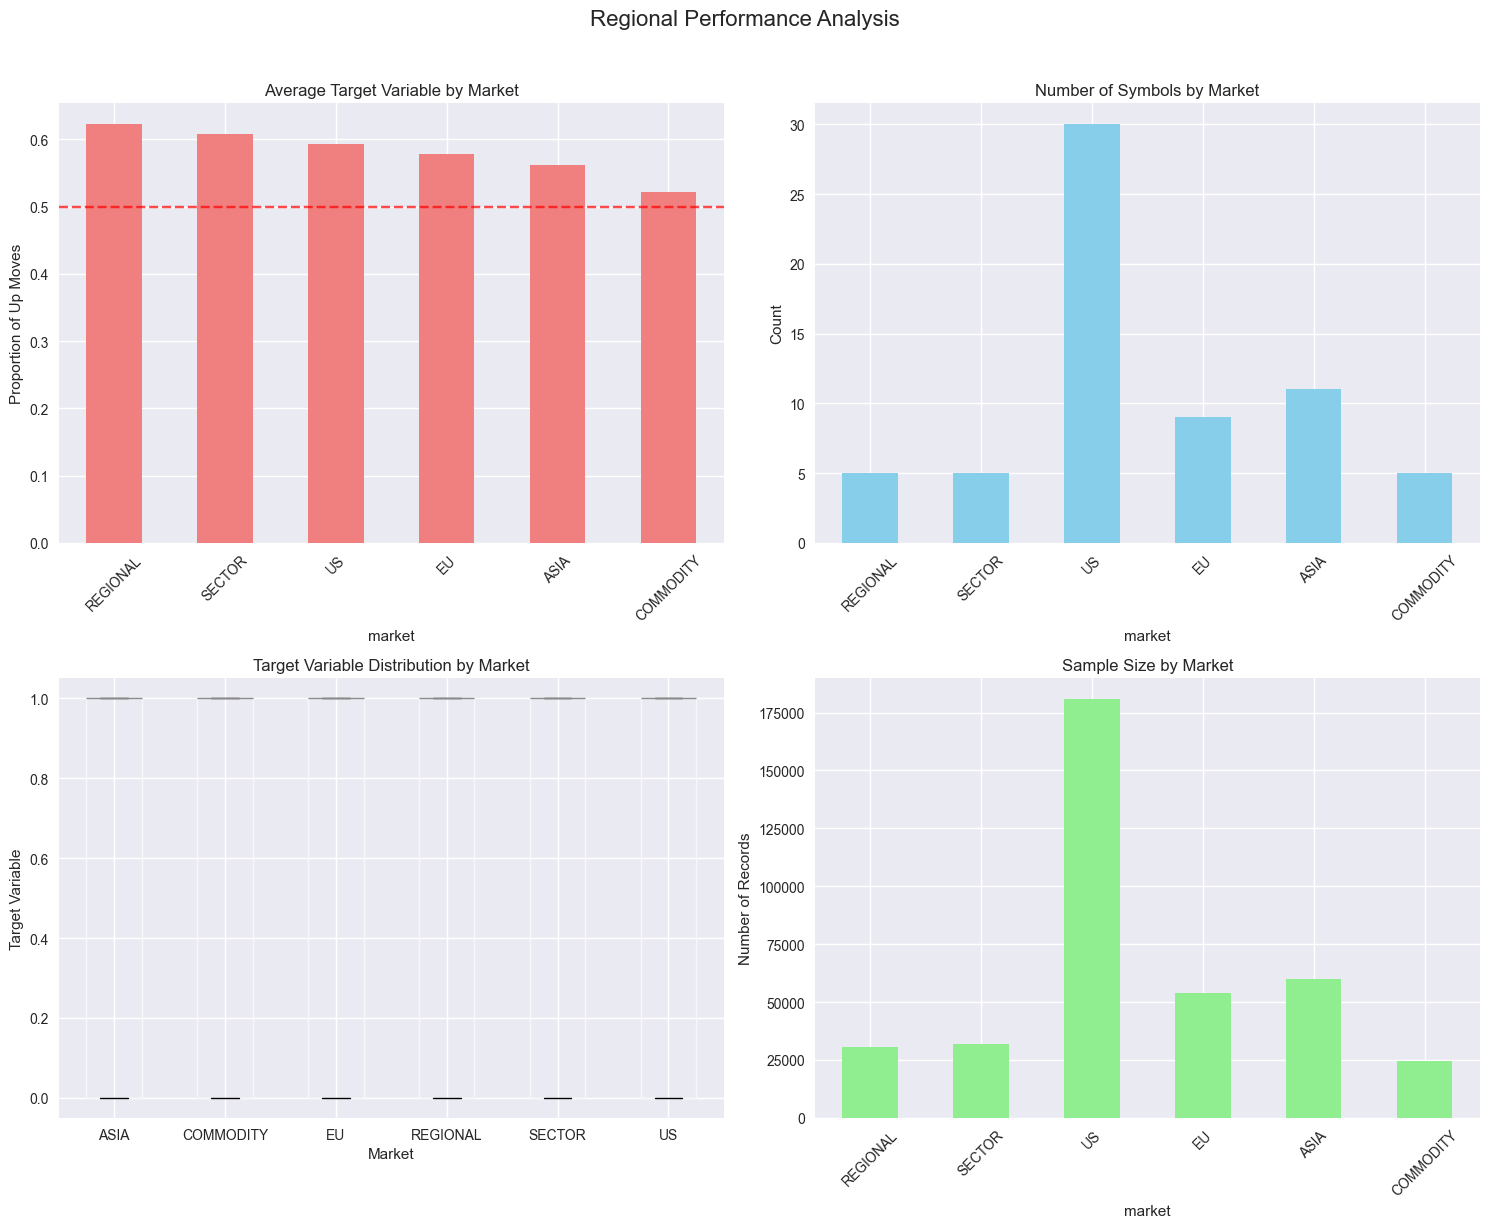

In [11]:
# Regional performance analysis (Module 02 groupby patterns)
print("=== REGIONAL PERFORMANCE ANALYSIS ===")

# Target variable by market
regional_performance = df.groupby('market').agg({
    'y_30d': ['count', 'mean', 'std'],
    'ret_30d': ['mean', 'std'] if 'ret_30d' in df.columns else ['count'],
    'symbol': 'nunique'
}).round(4)

# Flatten column names
regional_performance.columns = ['_'.join(col).strip() for col in regional_performance.columns]
regional_performance = regional_performance.sort_values('y_30d_mean', ascending=False)

print("\n📊 Target Variable Performance by Market:")
print(regional_performance)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Target variable mean by market
regional_performance['y_30d_mean'].plot(kind='bar', ax=axes[0,0], color='lightcoral')
axes[0,0].set_title('Average Target Variable by Market')
axes[0,0].set_ylabel('Proportion of Up Moves')
axes[0,0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7)
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Number of symbols by market
regional_performance['symbol_nunique'].plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Number of Symbols by Market')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Target variable distribution by market (box plot)
df.boxplot(column='y_30d', by='market', ax=axes[1,0])
axes[1,0].set_title('Target Variable Distribution by Market')
axes[1,0].set_ylabel('Target Variable')
axes[1,0].set_xlabel('Market')

# 4. Sample size by market
regional_performance['y_30d_count'].plot(kind='bar', ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Sample Size by Market')
axes[1,1].set_ylabel('Number of Records')
axes[1,1].tick_params(axis='x', rotation=45)

plt.suptitle('Regional Performance Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [12]:
# Statistical significance testing (Module 02 statistical analysis)
from scipy import stats

print("=== STATISTICAL SIGNIFICANCE TESTING ===")

markets = df['market'].unique()
print(f"\n🧪 Testing differences between markets:")

# Pairwise t-tests between markets
significant_pairs = []
for i, market1 in enumerate(markets):
    for j, market2 in enumerate(markets[i+1:], i+1):
        group1 = df[df['market'] == market1]['y_30d']
        group2 = df[df['market'] == market2]['y_30d']
        
        if len(group1) > 30 and len(group2) > 30:  # Sufficient sample size
            statistic, p_value = stats.ttest_ind(group1, group2)
            
            mean1 = group1.mean()
            mean2 = group2.mean()
            
            print(f"  {market1} vs {market2}:")
            print(f"    Means: {mean1:.3f} vs {mean2:.3f}")
            print(f"    t-statistic: {statistic:.3f}, p-value: {p_value:.4f}")
            
            if p_value < 0.05:
                significant_pairs.append((market1, market2, p_value, abs(mean1 - mean2)))
                print(f"    ✅ Significant difference (p < 0.05)")
            else:
                print(f"    ❌ No significant difference (p ≥ 0.05)")
            print()

if significant_pairs:
    print(f"\n🎯 Summary of significant differences:")
    for market1, market2, p_val, diff in sorted(significant_pairs, key=lambda x: x[2]):
        print(f"  {market1} vs {market2}: p={p_val:.4f}, |diff|={diff:.3f}")
else:
    print(f"\n📊 No statistically significant differences found between markets.")

=== STATISTICAL SIGNIFICANCE TESTING ===

🧪 Testing differences between markets:
  ASIA vs US:
    Means: 0.562 vs 0.593
    t-statistic: -13.028, p-value: 0.0000
    ✅ Significant difference (p < 0.05)

  ASIA vs SECTOR:
    Means: 0.562 vs 0.608
    t-statistic: -13.438, p-value: 0.0000
    ✅ Significant difference (p < 0.05)

  ASIA vs EU:
    Means: 0.562 vs 0.578
    t-statistic: -5.335, p-value: 0.0000
    ✅ Significant difference (p < 0.05)

  ASIA vs REGIONAL:
    Means: 0.562 vs 0.622
    t-statistic: -17.381, p-value: 0.0000
    ✅ Significant difference (p < 0.05)

  ASIA vs COMMODITY:
    Means: 0.562 vs 0.521
    t-statistic: 10.946, p-value: 0.0000
    ✅ Significant difference (p < 0.05)

  US vs SECTOR:
    Means: 0.593 vs 0.608
    t-statistic: -5.253, p-value: 0.0000
    ✅ Significant difference (p < 0.05)

  US vs EU:
    Means: 0.593 vs 0.578
    t-statistic: 6.012, p-value: 0.0000
    ✅ Significant difference (p < 0.05)

  US vs REGIONAL:
    Means: 0.593 vs 0.622
  

## 5. Macro Indicators Analysis

Analyzing the impact of macroeconomic indicators on target variable, following Module 02 time series analysis patterns.

=== MACRO INDICATORS ANALYSIS ===

📊 Macro indicators found: ['vix', 'tnx10y', 'dxy']

🔍 Macro-Target Correlations:
  vix: 0.0274
  tnx10y: -0.0720
  dxy: -0.0018


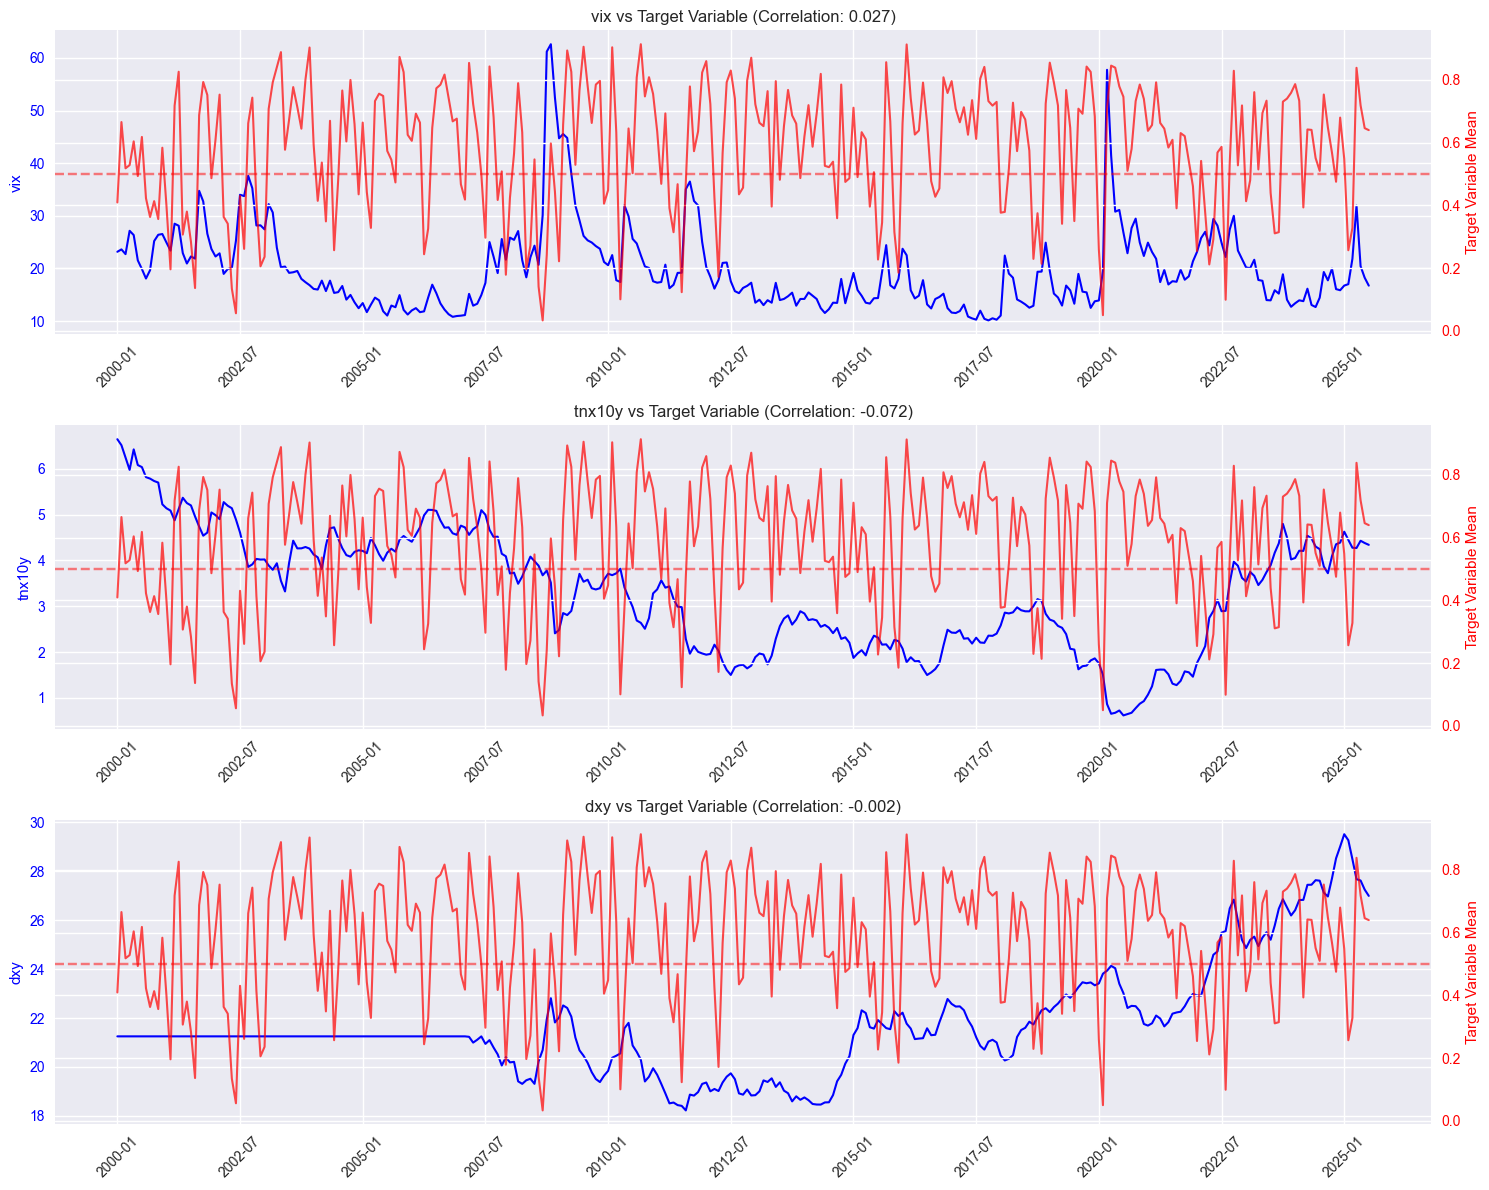

In [13]:
# Macro indicators analysis (Module 02 time series patterns)
print("=== MACRO INDICATORS ANALYSIS ===")

# Identify macro columns
macro_cols = [col for col in df.columns if any(macro in col.lower() for macro in ['vix', 'tnx', 'dxy'])]
print(f"\n📊 Macro indicators found: {macro_cols}")

if macro_cols:
    # Analyze correlation between macro indicators and target
    macro_target_corrs = df[macro_cols + ['y_30d']].corr()['y_30d'].drop('y_30d')
    print(f"\n🔍 Macro-Target Correlations:")
    for macro, corr in macro_target_corrs.items():
        print(f"  {macro}: {corr:.4f}")
    
    # Time series visualization
    if len(macro_cols) >= 2:
        fig, axes = plt.subplots(len(macro_cols), 1, figsize=(15, 4*len(macro_cols)))
        if len(macro_cols) == 1:
            axes = [axes]
        
        for i, macro_col in enumerate(macro_cols):
            # Monthly aggregation for cleaner visualization
            monthly_data = df.groupby(df.index.to_period('M')).agg({
                macro_col: 'mean',
                'y_30d': 'mean'
            })
            
            # Create dual axis plot
            ax1 = axes[i]
            ax2 = ax1.twinx()
            
            # Plot macro indicator
            line1 = ax1.plot(monthly_data.index.astype(str), monthly_data[macro_col], 
                           color='blue', label=macro_col, linewidth=1.5)
            ax1.set_ylabel(macro_col, color='blue')
            ax1.tick_params(axis='y', labelcolor='blue')
            
            # Plot target variable
            line2 = ax2.plot(monthly_data.index.astype(str), monthly_data['y_30d'], 
                           color='red', label='Target Mean', linewidth=1.5, alpha=0.7)
            ax2.set_ylabel('Target Variable Mean', color='red')
            ax2.tick_params(axis='y', labelcolor='red')
            ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
            
            # Formatting
            ax1.set_title(f'{macro_col} vs Target Variable (Correlation: {macro_target_corrs[macro_col]:.3f})')
            ax1.tick_params(axis='x', rotation=45)
            
            # Show every 12th tick for readability
            tick_positions = range(0, len(monthly_data), max(1, len(monthly_data)//10))
            ax1.set_xticks(tick_positions)
            ax1.set_xticklabels([monthly_data.index.astype(str)[i] for i in tick_positions])
        
        plt.tight_layout()
        plt.show()
else:
    print("\n❌ No macro indicators found in the dataset.")

=== MACRO REGIME ANALYSIS ===

📊 Analysis for vix:
             count    mean     std
vix_regime                        
High         95419  0.6139  0.4868
Low          95566  0.5828  0.4931
Medium-High  95433  0.5683  0.4953
Medium-Low   95290  0.5745  0.4944


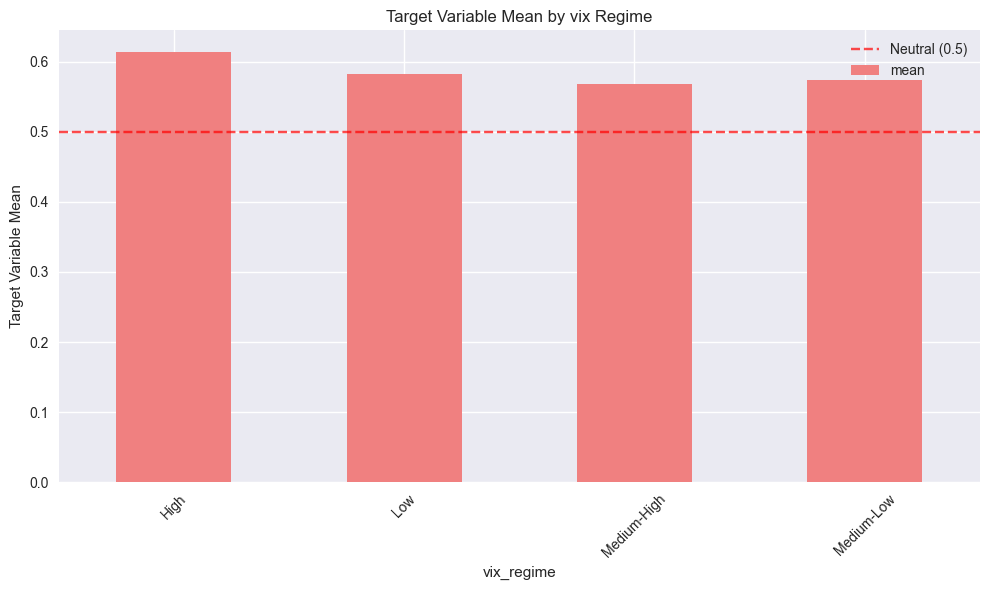


📊 Analysis for tnx10y:
               count    mean     std
tnx10y_regime                       
High           95274  0.5573  0.4967
Low            95489  0.6363  0.4811
Medium-High    95351  0.5678  0.4954
Medium-Low     95594  0.5781  0.4939


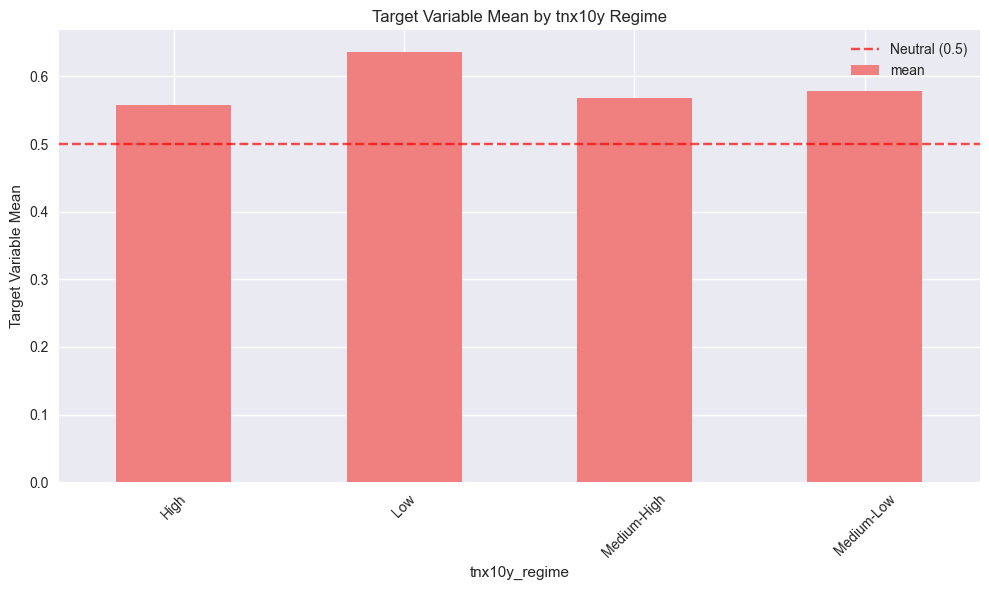


📊 Analysis for dxy:
              count    mean     std
dxy_regime                         
High          95379  0.5914  0.4916
Low           95452  0.5891  0.4920
Medium-High   69609  0.5808  0.4934
Medium-Low   121268  0.5788  0.4938


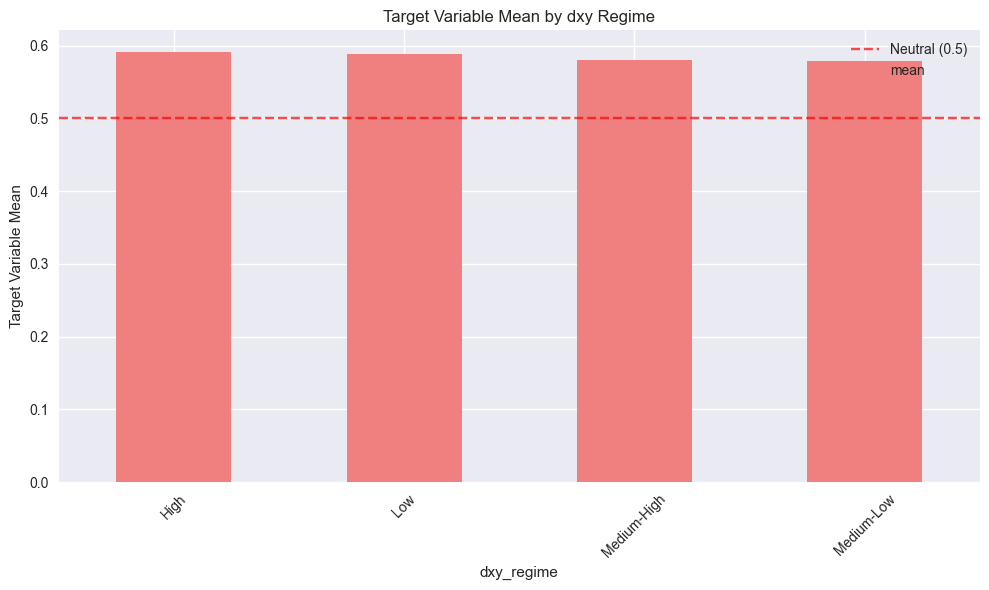

In [14]:
# Macro regime analysis (Module 02 conditional analysis)
if macro_cols:
    print("=== MACRO REGIME ANALYSIS ===")
    
    # Analyze target variable under different macro conditions
    for macro_col in macro_cols:
        if df[macro_col].notna().sum() > 100:  # Sufficient data
            print(f"\n📊 Analysis for {macro_col}:")
            
            # Create quartile-based regimes
            quartiles = df[macro_col].quantile([0.25, 0.5, 0.75])
            
            def get_regime(value):
                if pd.isna(value):
                    return 'Missing'
                elif value <= quartiles[0.25]:
                    return 'Low'
                elif value <= quartiles[0.5]:
                    return 'Medium-Low'
                elif value <= quartiles[0.75]:
                    return 'Medium-High'
                else:
                    return 'High'
            
            df[f'{macro_col}_regime'] = df[macro_col].apply(get_regime)
            
            # Analyze target by regime
            regime_analysis = df.groupby(f'{macro_col}_regime')['y_30d'].agg([
                'count', 'mean', 'std'
            ]).round(4)
            
            print(regime_analysis)
            
            # Visualization
            plt.figure(figsize=(10, 6))
            regime_analysis['mean'].plot(kind='bar', color='lightcoral')
            plt.title(f'Target Variable Mean by {macro_col} Regime')
            plt.ylabel('Target Variable Mean')
            plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Neutral (0.5)')
            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

## 6. Temporal Patterns Analysis

Analyzing seasonality and temporal patterns in the target variable, following Module 02 time series analysis.

=== TEMPORAL PATTERNS ANALYSIS ===


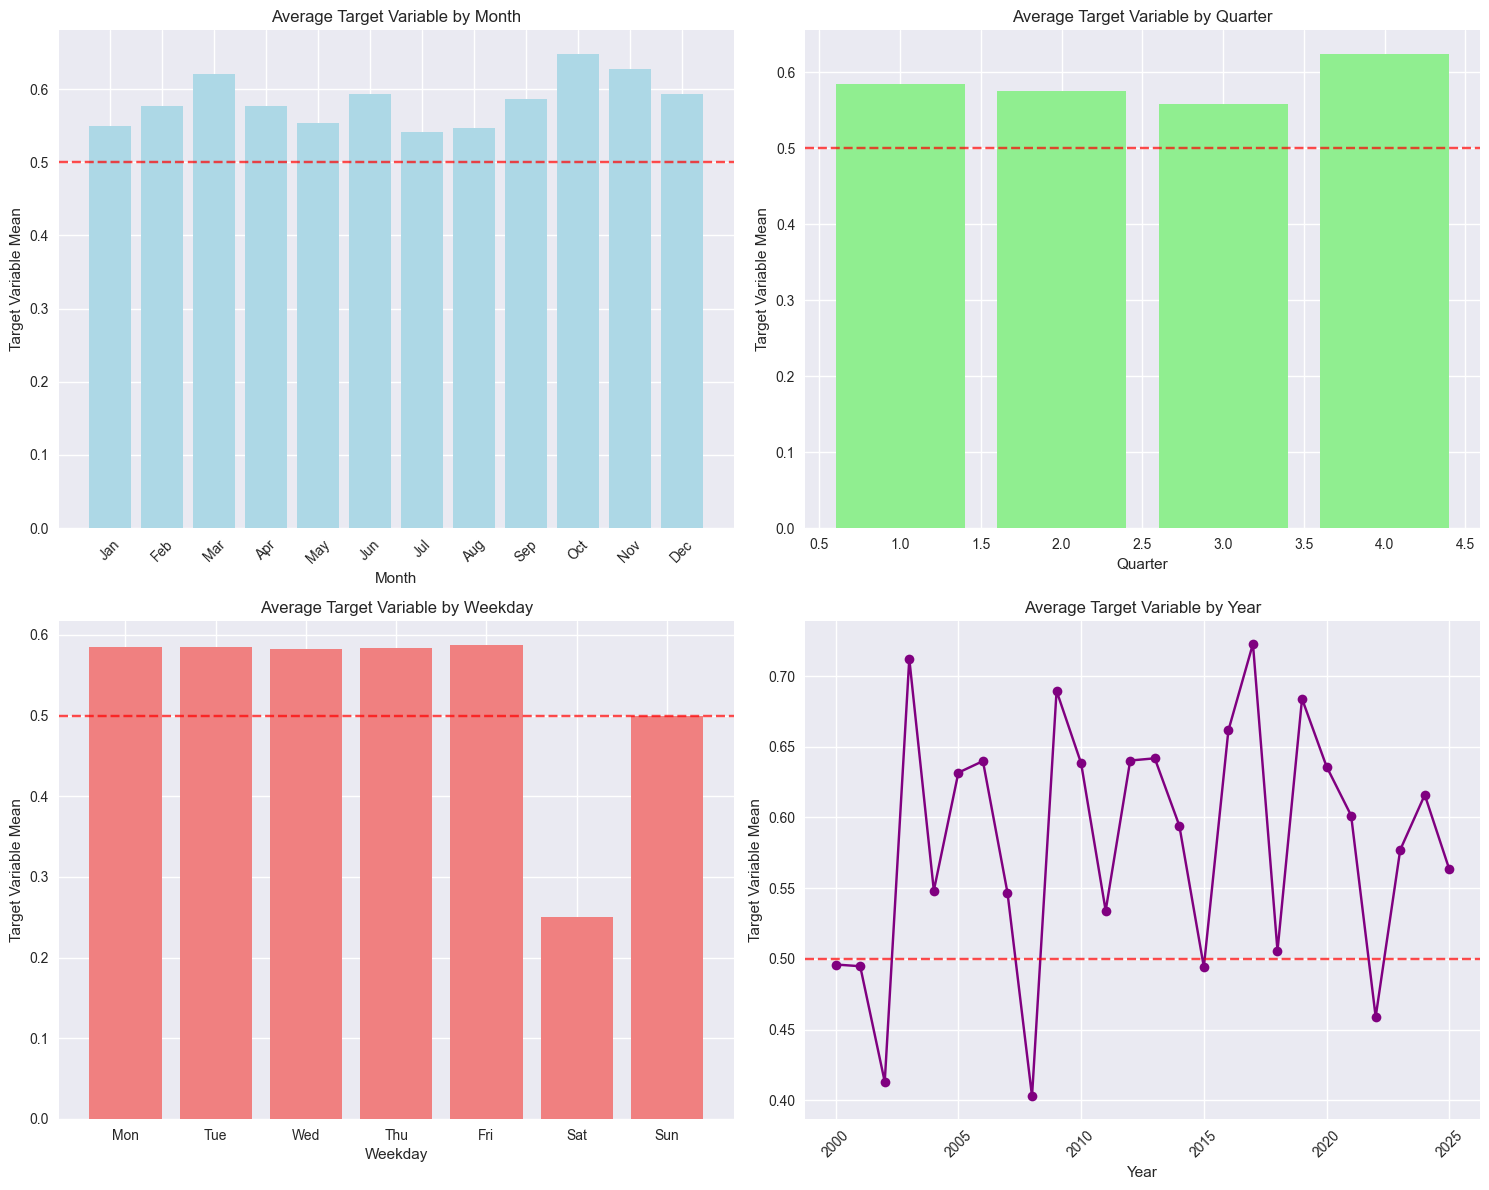


📊 Seasonal Insights:
  Best month: Oct (0.648)
  Worst month: Jul (0.541)
  Best quarter: Q4 (0.624)
  Best weekday: Fri (0.588)
  Worst weekday: Sat (0.250)


In [15]:
# Temporal patterns analysis (Module 02 datetime analysis)
print("=== TEMPORAL PATTERNS ANALYSIS ===")

# Add temporal features
df['year'] = df.index.year
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['weekday'] = df.index.weekday
df['day_of_month'] = df.index.day

# Month names for better visualization
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Seasonal analysis
seasonal_analysis = {
    'Monthly': df.groupby('month')['y_30d'].agg(['count', 'mean', 'std']),
    'Quarterly': df.groupby('quarter')['y_30d'].agg(['count', 'mean', 'std']),
    'Weekday': df.groupby('weekday')['y_30d'].agg(['count', 'mean', 'std']),
    'Yearly': df.groupby('year')['y_30d'].agg(['count', 'mean', 'std'])
}

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Monthly patterns
monthly_means = seasonal_analysis['Monthly']['mean']
axes[0,0].bar(range(1, 13), monthly_means, color='lightblue')
axes[0,0].set_title('Average Target Variable by Month')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Target Variable Mean')
axes[0,0].set_xticks(range(1, 13))
axes[0,0].set_xticklabels(month_names)
axes[0,0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7)
axes[0,0].tick_params(axis='x', rotation=45)

# Quarterly patterns
quarterly_means = seasonal_analysis['Quarterly']['mean']
axes[0,1].bar(range(1, 5), quarterly_means, color='lightgreen')
axes[0,1].set_title('Average Target Variable by Quarter')
axes[0,1].set_xlabel('Quarter')
axes[0,1].set_ylabel('Target Variable Mean')
axes[0,1].axhline(y=0.5, color='red', linestyle='--', alpha=0.7)

# Weekday patterns
weekday_means = seasonal_analysis['Weekday']['mean']
axes[1,0].bar(range(7), weekday_means, color='lightcoral')
axes[1,0].set_title('Average Target Variable by Weekday')
axes[1,0].set_xlabel('Weekday')
axes[1,0].set_ylabel('Target Variable Mean')
axes[1,0].set_xticks(range(7))
axes[1,0].set_xticklabels(weekday_names)
axes[1,0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7)

# Yearly trends
yearly_means = seasonal_analysis['Yearly']['mean']
yearly_means.plot(ax=axes[1,1], marker='o', color='purple')
axes[1,1].set_title('Average Target Variable by Year')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Target Variable Mean')
axes[1,1].axhline(y=0.5, color='red', linestyle='--', alpha=0.7)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print statistical insights
print(f"\n📊 Seasonal Insights:")
print(f"  Best month: {month_names[monthly_means.idxmax()-1]} ({monthly_means.max():.3f})")
print(f"  Worst month: {month_names[monthly_means.idxmin()-1]} ({monthly_means.min():.3f})")
print(f"  Best quarter: Q{quarterly_means.idxmax()} ({quarterly_means.max():.3f})")
print(f"  Best weekday: {weekday_names[weekday_means.idxmax()]} ({weekday_means.max():.3f})")
print(f"  Worst weekday: {weekday_names[weekday_means.idxmin()]} ({weekday_means.min():.3f})")

## 7. Feature Engineering Validation

Analyzing the effectiveness of engineered technical indicators, following Module 02 feature analysis patterns.

=== TECHNICAL INDICATORS EFFECTIVENESS ===

📊 Technical Indicator Category Effectiveness:
                      count avg_abs_corr max_abs_corr  best_indicator  \
Volatility Indicators     6     0.015216     0.019296         vol_20d   
Moving Averages           8     0.014449     0.017226   volume_sma_20   
Price Ratios              7     0.008726     0.013275  dist_high_252d   
Return Features           6     0.007924     0.014216          ret_5d   
Momentum Indicators       6     0.003198     0.005784          rsi_14   

                      best_correlation  
Volatility Indicators        -0.019296  
Moving Averages              -0.017226  
Price Ratios                  0.013275  
Return Features              -0.014216  
Momentum Indicators          -0.005784  


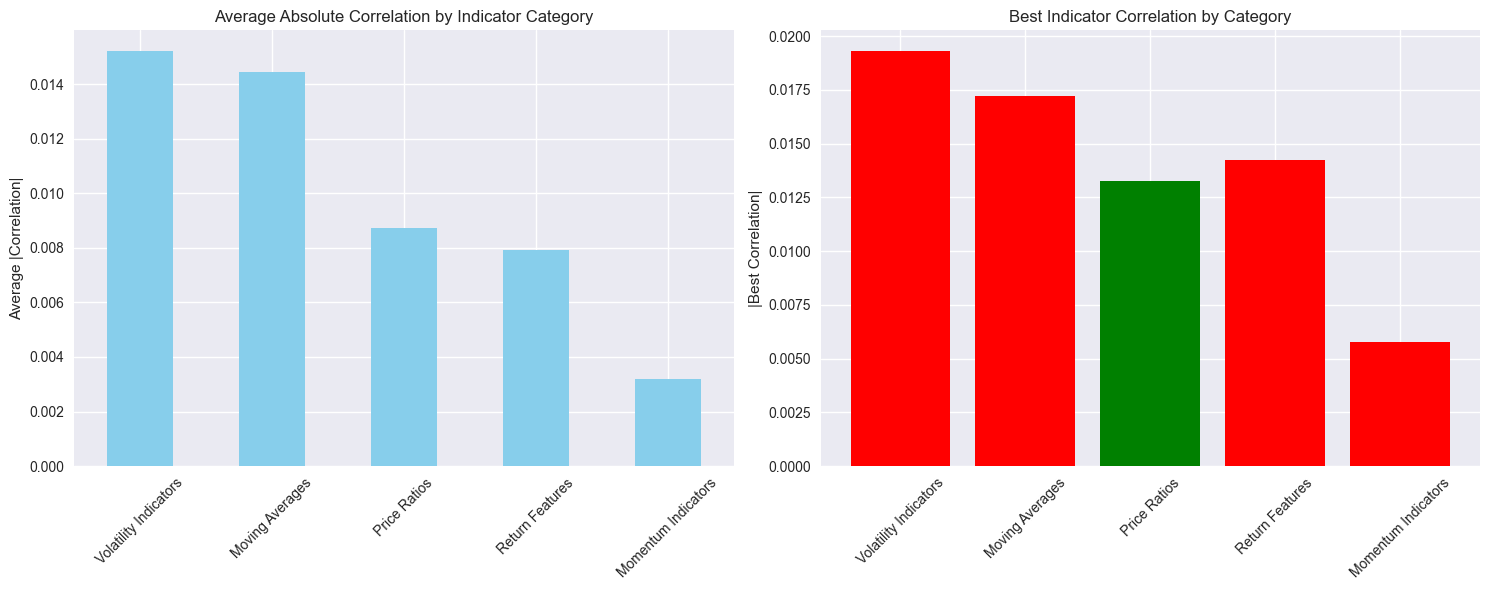


🏆 Best Indicators by Category:
  Volatility Indicators: vol_20d (corr: -0.0193)
  Moving Averages: volume_sma_20 (corr: -0.0172)
  Price Ratios: dist_high_252d (corr: 0.0133)
  Return Features: ret_5d (corr: -0.0142)
  Momentum Indicators: rsi_14 (corr: -0.0058)


In [16]:
# Technical indicators effectiveness (Module 02 feature validation)
print("=== TECHNICAL INDICATORS EFFECTIVENESS ===")

# Analyze different categories of technical indicators
indicator_categories = {
    'Moving Averages': [col for col in feature_cols if any(x in col for x in ['sma_', 'ema_'])],
    'Momentum Indicators': [col for col in feature_cols if any(x in col for x in ['rsi_', 'macd'])],
    'Volatility Indicators': [col for col in feature_cols if any(x in col for x in ['vol_', 'bb_', 'atr_'])],
    'Price Ratios': [col for col in feature_cols if any(x in col for x in ['price_', 'dist_'])],
    'Return Features': [col for col in feature_cols if 'ret_' in col and not col.startswith('ret_future')]
}

# Calculate effectiveness metrics for each category
category_effectiveness = {}
for category, indicators in indicator_categories.items():
    if indicators:
        # Calculate average absolute correlation with target
        cat_corrs = target_corrs[indicators].abs()
        category_effectiveness[category] = {
            'count': len(indicators),
            'avg_abs_corr': cat_corrs.mean(),
            'max_abs_corr': cat_corrs.max(),
            'best_indicator': cat_corrs.idxmax(),
            'best_correlation': target_corrs[cat_corrs.idxmax()]
        }

# Create summary DataFrame
effectiveness_df = pd.DataFrame(category_effectiveness).T
effectiveness_df = effectiveness_df.sort_values('avg_abs_corr', ascending=False)

print(f"\n📊 Technical Indicator Category Effectiveness:")
print(effectiveness_df.round(4))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Average effectiveness by category
effectiveness_df['avg_abs_corr'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Average Absolute Correlation by Indicator Category')
ax1.set_ylabel('Average |Correlation|')
ax1.tick_params(axis='x', rotation=45)

# Best indicator per category
best_corrs = [effectiveness_df.loc[cat, 'best_correlation'] for cat in effectiveness_df.index]
colors = ['green' if x > 0 else 'red' for x in best_corrs]
ax2.bar(range(len(effectiveness_df)), [abs(x) for x in best_corrs], color=colors)
ax2.set_title('Best Indicator Correlation by Category')
ax2.set_ylabel('|Best Correlation|')
ax2.set_xticks(range(len(effectiveness_df)))
ax2.set_xticklabels(effectiveness_df.index, rotation=45)

plt.tight_layout()
plt.show()

# Detailed analysis of best indicators
print(f"\n🏆 Best Indicators by Category:")
for category in effectiveness_df.index:
    best_ind = effectiveness_df.loc[category, 'best_indicator']
    best_corr = effectiveness_df.loc[category, 'best_correlation']
    print(f"  {category}: {best_ind} (corr: {best_corr:.4f})")

=== KEY INDICATORS DISTRIBUTION ANALYSIS ===


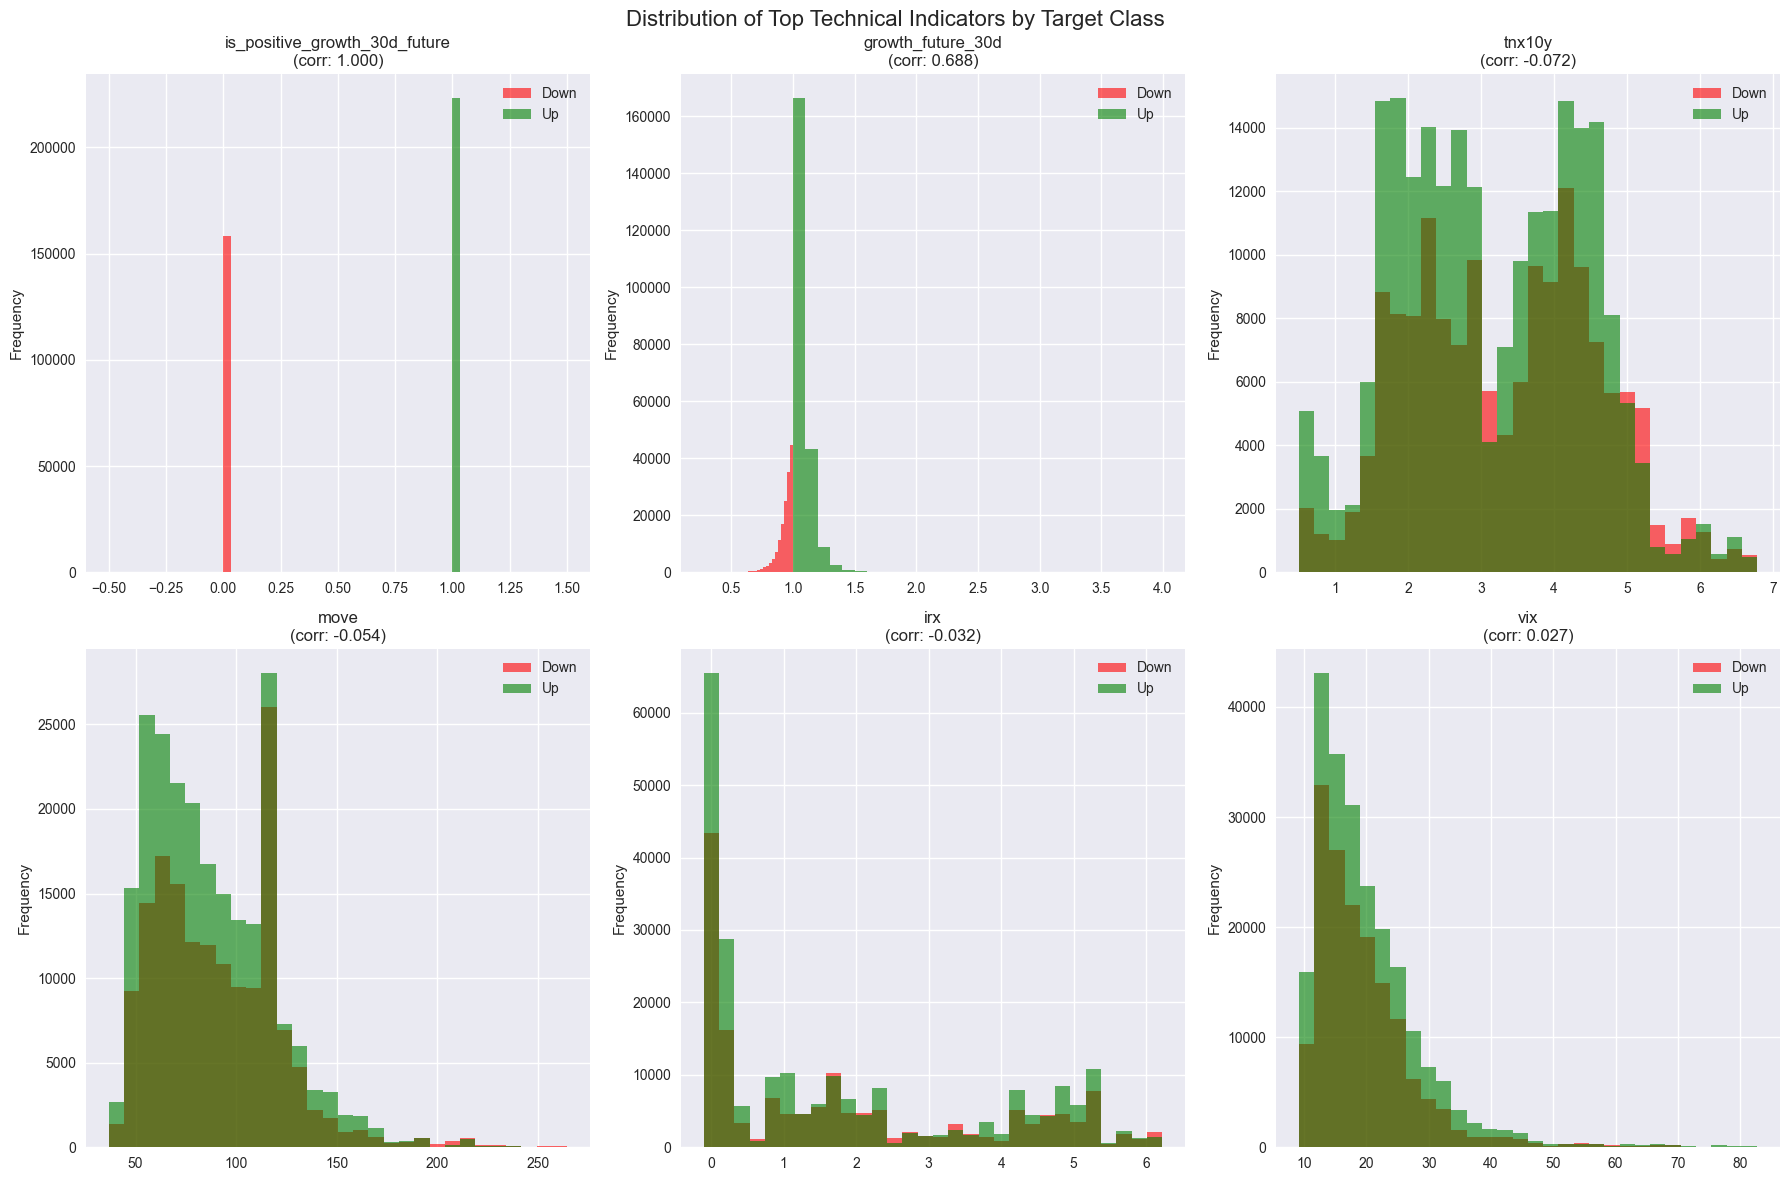

In [17]:
# Distribution analysis of key technical indicators
print("=== KEY INDICATORS DISTRIBUTION ANALYSIS ===")

# Select top 6 indicators for detailed analysis
top_indicators = target_corrs_abs.head(6).index.tolist()

if len(top_indicators) >= 6:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, indicator in enumerate(top_indicators):
        # Distribution by target class
        for target_class in [0, 1]:
            data = df[df['y_30d'] == target_class][indicator].dropna()
            label = 'Down' if target_class == 0 else 'Up'
            color = 'red' if target_class == 0 else 'green'
            axes[i].hist(data, alpha=0.6, label=label, color=color, bins=30)
        
        axes[i].set_title(f'{indicator}\n(corr: {target_corrs[indicator]:.3f})')
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
    
    plt.suptitle('Distribution of Top Technical Indicators by Target Class', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ Not enough indicators for detailed distribution analysis ({len(top_indicators)} found)")

## 8. Summary and Key Findings

Comprehensive summary of EDA findings and actionable insights for model development.

In [18]:
# Comprehensive EDA summary
print("=" * 60)
print("           COMPREHENSIVE EDA SUMMARY")
print("=" * 60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"  • Total records: {len(df):,}")
print(f"  • Date range: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
print(f"  • Unique symbols: {df['symbol'].nunique()}")
print(f"  • Markets covered: {', '.join(df['market'].unique())}")
print(f"  • Total features: {len(feature_cols)}")

print(f"\n🎯 TARGET VARIABLE ANALYSIS:")
target_mean = df['y_30d'].mean()
print(f"  • Class balance: {(1-target_mean)*100:.1f}% Down, {target_mean*100:.1f}% Up")
print(f"  • Target bias: {'Bearish' if target_mean < 0.5 else 'Bullish' if target_mean > 0.52 else 'Neutral'}")

if 'best_month' in locals():
    print(f"  • Best performing month: {month_names[monthly_means.idxmax()-1]}")
    print(f"  • Worst performing month: {month_names[monthly_means.idxmin()-1]}")

print(f"\n🔍 FEATURE ANALYSIS:")
print(f"  • Avg feature-target correlation: {target_corrs_abs.mean():.4f}")
print(f"  • Strongest positive correlation: {target_corrs.max():.4f} ({target_corrs.idxmax()})")
print(f"  • Strongest negative correlation: {target_corrs.min():.4f} ({target_corrs.idxmin()})")
print(f"  • Features with |corr| > 0.05: {(target_corrs_abs > 0.05).sum()}")

if category_effectiveness:
    best_category = effectiveness_df.index[0]
    best_category_corr = effectiveness_df.loc[best_category, 'avg_abs_corr']
    print(f"  • Most effective category: {best_category} (avg |corr|: {best_category_corr:.4f})")

print(f"\n🌍 REGIONAL ANALYSIS:")
if len(regional_performance) > 1:
    best_market = regional_performance['y_30d_mean'].idxmax()
    worst_market = regional_performance['y_30d_mean'].idxmin()
    print(f"  • Best performing market: {best_market} ({regional_performance.loc[best_market, 'y_30d_mean']:.3f})")
    print(f"  • Worst performing market: {worst_market} ({regional_performance.loc[worst_market, 'y_30d_mean']:.3f})")
    
    if significant_pairs:
        print(f"  • Statistically significant differences: {len(significant_pairs)} pairs")
    else:
        print(f"  • No statistically significant regional differences found")

if macro_cols:
    print(f"\n📈 MACRO INDICATORS:")
    print(f"  • Macro indicators available: {len(macro_cols)}")
    strongest_macro = macro_target_corrs.abs().idxmax()
    strongest_macro_corr = macro_target_corrs[strongest_macro]
    print(f"  • Strongest macro correlation: {strongest_macro} ({strongest_macro_corr:.4f})")

print(f"\n💡 KEY INSIGHTS FOR MODELING:")
insights = []

# Class balance insight
if abs(target_mean - 0.5) > 0.05:
    bias_direction = 'bearish' if target_mean < 0.5 else 'bullish'
    insights.append(f"Dataset has {bias_direction} bias - consider class balancing")

# Feature correlation insights
strong_features = (target_corrs_abs > 0.05).sum()
if strong_features > 10:
    insights.append(f"{strong_features} features show meaningful correlation - good for modeling")
elif strong_features < 5:
    insights.append(f"Only {strong_features} features show strong correlation - may need feature engineering")

# Multicollinearity insight
if high_corr_pairs:
    insights.append(f"{len(high_corr_pairs)} highly correlated feature pairs - consider dimensionality reduction")

# Regional insights
if len(regional_performance) > 1:
    market_range = regional_performance['y_30d_mean'].max() - regional_performance['y_30d_mean'].min()
    if market_range > 0.05:
        insights.append("Significant regional differences - consider market-specific features")

# Temporal insights
if 'monthly_means' in locals():
    seasonal_range = monthly_means.max() - monthly_means.min()
    if seasonal_range > 0.05:
        insights.append("Strong seasonal patterns detected - add temporal features")

for i, insight in enumerate(insights, 1):
    print(f"  {i}. {insight}")

print(f"\n✅ EDA COMPLETE - Ready for model development!")
print("=" * 60)

           COMPREHENSIVE EDA SUMMARY

📊 DATASET OVERVIEW:
  • Total records: 381,708
  • Date range: 2000-01-03 to 2025-07-10
  • Unique symbols: 65
  • Markets covered: ASIA, US, SECTOR, EU, REGIONAL, COMMODITY
  • Total features: 50

🎯 TARGET VARIABLE ANALYSIS:
  • Class balance: 41.5% Down, 58.5% Up
  • Target bias: Bullish

🔍 FEATURE ANALYSIS:
  • Avg feature-target correlation: 0.0473
  • Strongest positive correlation: 1.0000 (is_positive_growth_30d_future)
  • Strongest negative correlation: -0.0720 (tnx10y)
  • Features with |corr| > 0.05: 4
  • Most effective category: Volatility Indicators (avg |corr|: 0.0152)

🌍 REGIONAL ANALYSIS:
  • Best performing market: REGIONAL (0.622)
  • Worst performing market: COMMODITY (0.521)
  • Statistically significant differences: 15 pairs

📈 MACRO INDICATORS:
  • Macro indicators available: 3
  • Strongest macro correlation: tnx10y (-0.0720)

💡 KEY INSIGHTS FOR MODELING:
  1. Dataset has bullish bias - consider class balancing
  2. Only 4 fe

In [19]:
# Save key findings for reporting
eda_results = {
    'dataset_overview': {
        'total_records': len(df),
        'date_range': f"{df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}",
        'unique_symbols': df['symbol'].nunique(),
        'markets': df['market'].unique().tolist(),
        'total_features': len(feature_cols)
    },
    'target_analysis': {
        'class_balance': {'down': (1-target_mean), 'up': target_mean},
        'target_bias': 'bearish' if target_mean < 0.5 else 'bullish' if target_mean > 0.52 else 'neutral'
    },
    'feature_correlations': {
        'avg_abs_correlation': target_corrs_abs.mean(),
        'strongest_positive': {'feature': target_corrs.idxmax(), 'correlation': target_corrs.max()},
        'strongest_negative': {'feature': target_corrs.idxmin(), 'correlation': target_corrs.min()},
        'strong_features_count': (target_corrs_abs > 0.05).sum()
    },
    'top_features': target_corrs_abs.head(10).to_dict()
}

# Save to JSON for later use
import json
from pathlib import Path

results_file = Path().resolve().parent / "data" / "reports" / "eda_results.json"
results_file.parent.mkdir(parents=True, exist_ok=True)

with open(results_file, 'w') as f:
    json.dump(eda_results, f, indent=2, default=str)

print(f"📄 EDA results saved to: {results_file}")
print(f"\n🎯 Next steps:")
print(f"   1. Review feature engineering based on correlation analysis")
print(f"   2. Consider adding regional/temporal features if significant differences found")
print(f"   3. Implement class balancing if needed")
print(f"   4. Proceed to model training with insights from this analysis")

📄 EDA results saved to: C:\Users\Gleb\work\courses\2025-05-30_stocks-analytics-course\project\data\reports\eda_results.json

🎯 Next steps:
   1. Review feature engineering based on correlation analysis
   2. Consider adding regional/temporal features if significant differences found
   3. Implement class balancing if needed
   4. Proceed to model training with insights from this analysis
